In [ ]:
import os
import cv2
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
# Mount Google Drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Function to read and label images
def process_images(base_path, label):
    print(f"Processing images in {base_path} with label {label}")
    data = []

    for image_name in os.listdir(base_path):
        image_path = os.path.join(base_path, image_name)

        # Check if the current item is a file
        if os.path.isfile(image_path):
            # Read image using OpenCV
            image = cv2.imread(image_path)

            # Additional processing steps can be added as needed

            # Add data to the list
            data.append({
                'path': image_path,
                'label': label
            })

    return data

In [ ]:
# Path to the Dataset folder in Google Drive
base_drive_path = "/content/gdrive/My Drive/Data_latih/Dataset of AI Generated Fruits and Real Fruits"



In [ ]:
# Process images for the AI folder
data_ai_overhead = process_images(os.path.join(base_drive_path, 'Ai', 'Green Apples', 'Overhead Shots'), 'Ai')
data_ai_side = process_images(os.path.join(base_drive_path, 'Ai', 'Green Apples', 'Side Shots'), 'Ai')
data_ai_overhead_red = process_images(os.path.join(base_drive_path, 'Ai', 'Red Apples', 'Overhead Shots'), 'Ai')
data_ai_side_red = process_images(os.path.join(base_drive_path, 'Ai', 'Red Apples', 'Side Shots'), 'Ai')

# Process images for the Real folder
data_real_overhead = process_images(os.path.join(base_drive_path, 'Real', 'Green Apples', 'Overhead Shots'), 'Real')
data_real_side = process_images(os.path.join(base_drive_path, 'Real', 'Green Apples', 'Side Shots'), 'Real')
data_real_overhead_red = process_images(os.path.join(base_drive_path, 'Real', 'Red Apples', 'Overhead Shots'), 'Real')
data_real_side_red = process_images(os.path.join(base_drive_path, 'Real', 'Red Apples', 'Side Shots'), 'Real')



Processing images in /content/gdrive/My Drive/Data_latih/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Overhead Shots with label Ai
Processing images in /content/gdrive/My Drive/Data_latih/Dataset of AI Generated Fruits and Real Fruits/Ai/Green Apples/Side Shots with label Ai
Processing images in /content/gdrive/My Drive/Data_latih/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Overhead Shots with label Ai
Processing images in /content/gdrive/My Drive/Data_latih/Dataset of AI Generated Fruits and Real Fruits/Ai/Red Apples/Side Shots with label Ai
Processing images in /content/gdrive/My Drive/Data_latih/Dataset of AI Generated Fruits and Real Fruits/Real/Green Apples/Overhead Shots with label Real
Processing images in /content/gdrive/My Drive/Data_latih/Dataset of AI Generated Fruits and Real Fruits/Real/Green Apples/Side Shots with label Real
Processing images in /content/gdrive/My Drive/Data_latih/Dataset of AI Generated Fruits and Real Fruits/Real/Red A

In [ ]:
# Concatenate data into a single dataframe
df = pd.concat([
    pd.DataFrame(data_ai_overhead),
    pd.DataFrame(data_ai_side),
    pd.DataFrame(data_ai_overhead_red),
    pd.DataFrame(data_ai_side_red),
    pd.DataFrame(data_real_overhead),
    pd.DataFrame(data_real_side),
    pd.DataFrame(data_real_overhead_red),
    pd.DataFrame(data_real_side_red)
], ignore_index=True)

df

,path,label
0,/content/gdrive/My Drive/Data_latih/Dataset of...,Ai
1,/content/gdrive/My Drive/Data_latih/Dataset of...,Ai
2,/content/gdrive/My Drive/Data_latih/Dataset of...,Ai
3,/content/gdrive/My Drive/Data_latih/Dataset of...,Ai
4,/content/gdrive/My Drive/Data_latih/Dataset of...,Ai
...,...,...
301,/content/gdrive/My Drive/Data_latih/Dataset of...,Real
302,/content/gdrive/My Drive/Data_latih/Dataset of...,Real
303,/content/gdrive/My Drive/Data_latih/Dataset of...,Real
304,/content/gdrive/My Drive/Data_latih/Dataset of...,Real


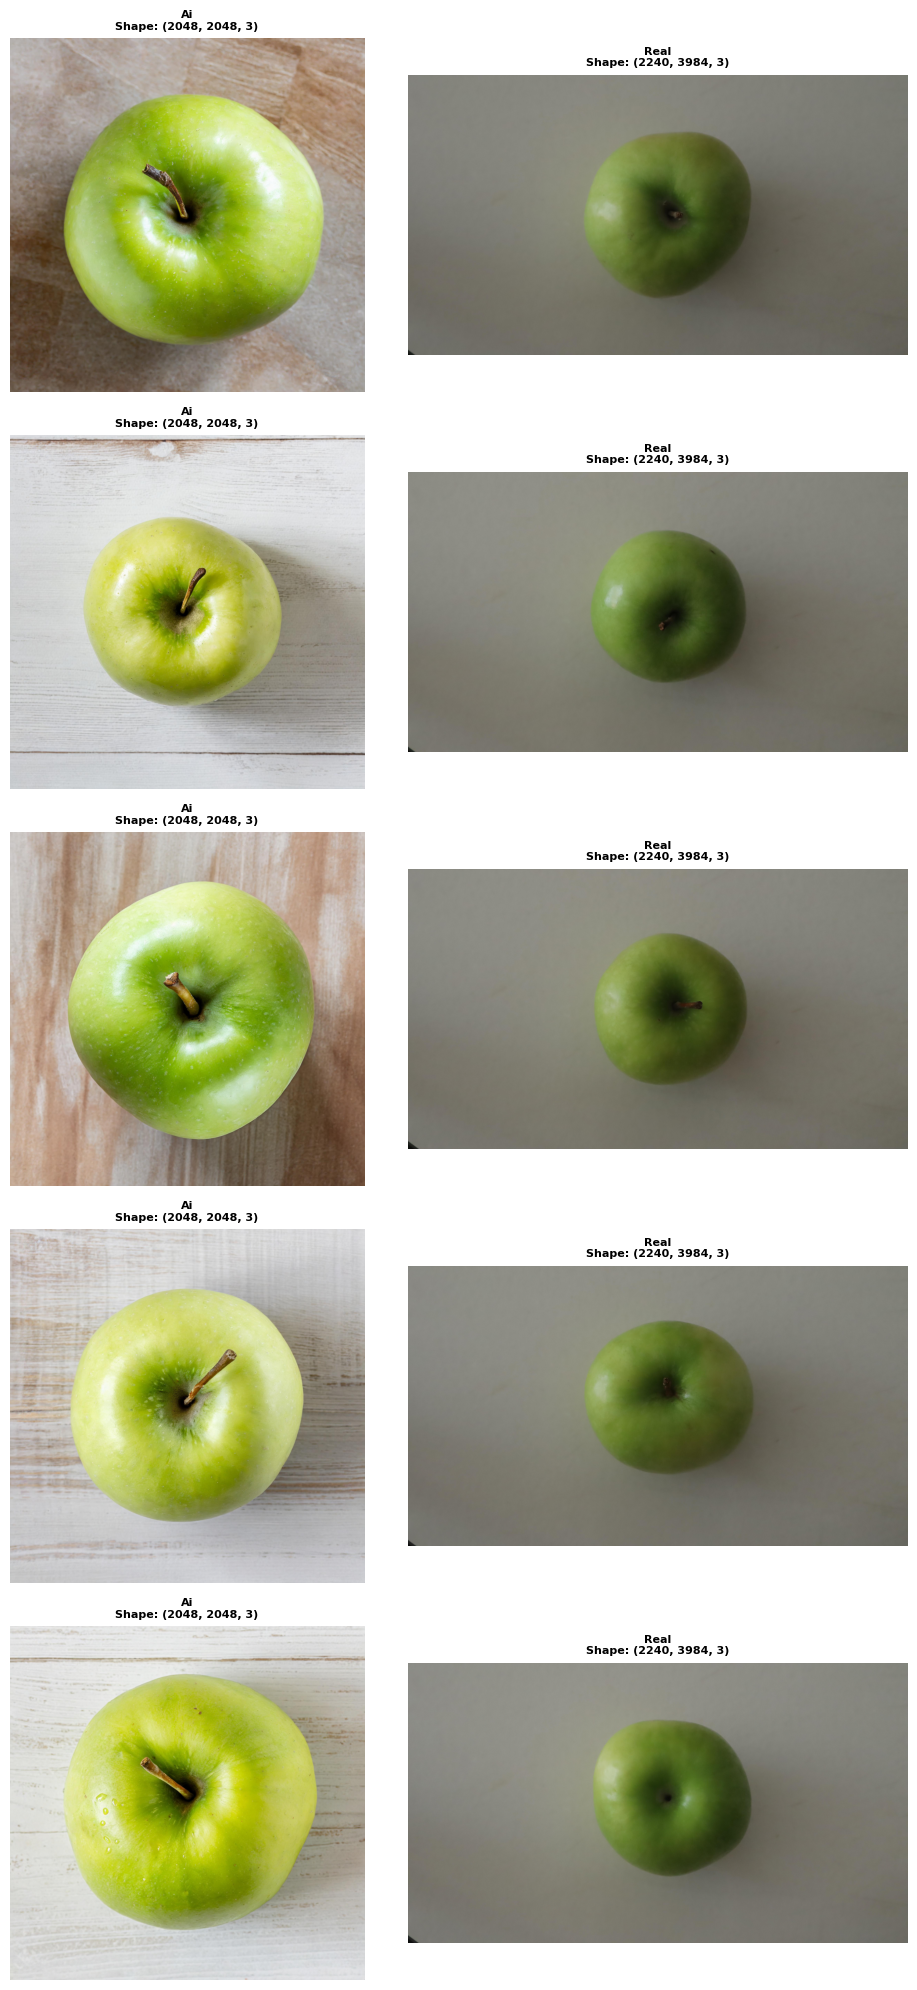

In [ ]:
# Sample lists
image_path_list_ai = df[df['label'] == 'Ai']['path'].tolist()[:5]
image_path_list_real = df[df['label'] == 'Real']['path'].tolist()[:5]

fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

for i, (img_ai, img_real) in enumerate(zip(image_path_list_ai, image_path_list_real)):
    img_bgr_ai = cv2.imread(str(img_ai))
    img_rgb_ai = cv2.cvtColor(img_bgr_ai, cv2.COLOR_BGR2RGB)
    ax[i, 0].imshow(img_rgb_ai)
    ax[i, 0].axis('off')
    ax[i, 0].set_title(f"Ai\nShape: {img_rgb_ai.shape}", fontsize=8, fontweight="bold")

    img_bgr_real = cv2.imread(str(img_real))
    img_rgb_real = cv2.cvtColor(img_bgr_real, cv2.COLOR_BGR2RGB)
    ax[i, 1].imshow(img_rgb_real)
    ax[i, 1].axis('off')
    ax[i, 1].set_title(f"Real\nShape: {img_rgb_real.shape}", fontsize=8, fontweight="bold")

fig.tight_layout()
plt.show()

In [ ]:
#Split the data into train, test, and validation sets
train_df, test_val_df = train_test_split(df, test_size=0.2, random_state=42)
test_df, val_df = train_test_split(test_val_df, test_size=0.5, random_state=42)

In [ ]:
# Define data generators for train, test, and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
test_val_datagen = ImageDataGenerator(rescale=1./255)

# Train set generator
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Test set generator
test_generator = test_val_datagen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Validation set generator
val_generator = test_val_datagen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 244 validated image filenames belonging to 2 classes.
Found 31 validated image filenames belonging to 2 classes.
Found 31 validated image filenames belonging to 2 classes.


In [ ]:
# Create the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))  # Two neurons for two classes

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 82944)             0         
                                                                 
 dense (Dense)               (None, 64)                5

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(val_generator)
)

Epoch 1/10
8/8 [==============================] - 21s 2s/step - loss: 1.1184 - accuracy: 0.6803 - val_loss: 0.4506 - val_accuracy: 0.5484
Epoch 2/10
8/8 [==============================] - 18s 2s/step - loss: 0.2802 - accuracy: 0.8893 - val_loss: 0.0680 - val_accuracy: 1.0000
Epoch 3/10
8/8 [==============================] - 17s 2s/step - loss: 0.0673 - accuracy: 0.9836 - val_loss: 0.0035 - val_accuracy: 1.0000
Epoch 4/10
8/8 [==============================] - 18s 2s/step - loss: 0.0264 - accuracy: 0.9877 - val_loss: 0.0345 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 20s 2s/step - loss: 0.0343 - accuracy: 0.9795 - val_loss: 4.1552e-04 - val_accuracy: 1.0000
Epoch 6/10
8/8 [==============================] - 17s 2s/step - loss: 0.0060 - accuracy: 0.9959 - val_loss: 0.0032 - val_accuracy: 1.0000
Epoch 7/10
8/8 [==============================] - 17s 2s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 2.7915e-04 - val_accuracy: 1.0000
Epoch 8/10
8/8 [==========

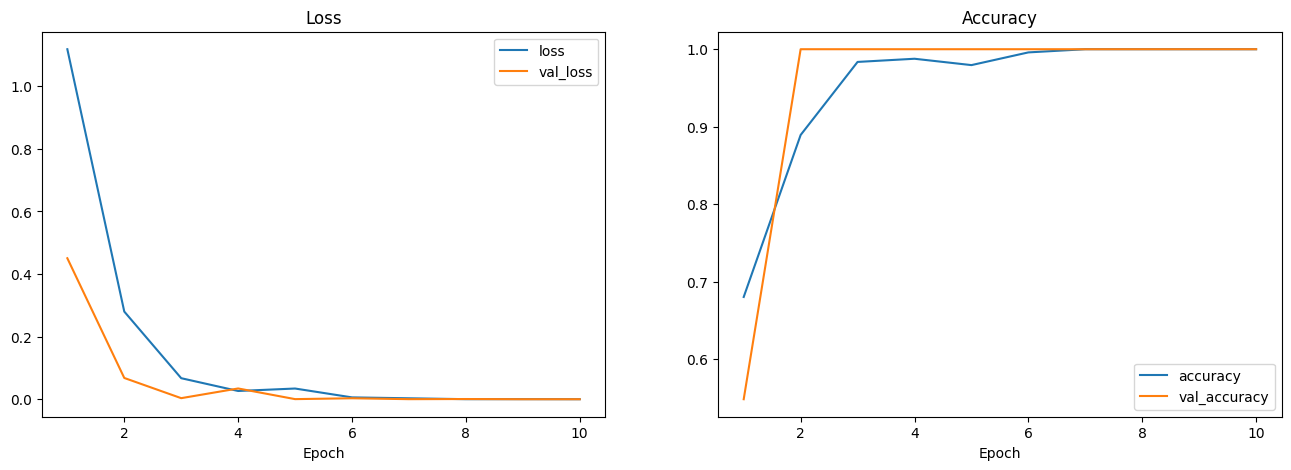

In [ ]:
epoch=10

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),history.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),history.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')
#ax[0].set_ylim(0,0.01)

ax[1].plot(range(1,epoch+1),history.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),history.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')
#ax[1].set_ylim(0.5,1.5)

plt.show()